<a href="https://colab.research.google.com/github/Dagobert42/langID-NLP/blob/main/langID_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Dataset Preparation
This subsection contains methods to produce uniformly distributed chunks of our data set. From these we can then obtain n-grams of different sizes. The Wikipedia Language Identification database contains txt-files of x_train and x_test for example sentences and accordingly ordered labels in y_train, y_test.
We read these examples and cluster them by their respective language label.

In [34]:
import numpy as np
import pandas as pd
import string
import re
import nltk
from nltk import ngrams
import collections
from collections import defaultdict
from collections import Counter

In [35]:
# read data
# written for the WiLI-2018 data set: https://zenodo.org/record/841984
# make sure txt-files are in the specified directory when running this
X_train = open('x_train.txt', encoding="utf8").read().split('\n')
Y_train = open('y_train.txt', encoding="utf8").read().split('\n')
X_test = open('x_test.txt', encoding="utf8").read().split('\n')
Y_test = open('y_test.txt', encoding="utf8").read().split('\n')
labels = pd.read_csv('labels.csv', delimiter = ';')

In [36]:
# preprocessing the data
def preprocess(X, Y):
    # remove unnecessary characters
    extras = '!"$%&/{}[]()=?\\`´*+~#-_.:,;<>|1234567890°-\''
    rx = '[' + re.escape(''.join(extras)) + ']'
    x_train = [] 
    for example in X:
        x_train.append(re.sub(' +', ' ', re.sub(rx, '', example)))
    
    # convert language labels to language Name => 'en' -> 'English'
    lab_dict = { labels.loc[i]['Label'] : labels.loc[i]['English'] for i in range(0, len(labels)) }
    y_train = [ lab_dict[item] if item != 'nan' else 'Min Nan Chinese' for item in Y ]

    return x_train, y_train

In [37]:
# sort data by language
def data_by_lang(X, Y):
    lang_corpora = defaultdict(list)
    lang_idx = defaultdict(list)
    for i in range(len(X)):
        lang_corpora[Y[i]] += X[i]
        lang_idx[Y[i]].append(i)

    return lang_corpora, lang_idx

In [38]:
# extract uniformly distributed list of examples from our data set
# takes an optional argument to constrain the list of languages
def get_data_chunk(X, Y, n_instances, lang_keys=[]):
    _, lang_idx = data_by_lang(X, Y)
    x_train = []
    y_train = []
    
    langs = set()
    if lang_keys: 
        langs = set(lang_keys)
    else:
        langs = set(Y)

    for lang in langs:
        indices = lang_idx[lang]
        for index in range(n_instances):
            x_train.append(X[indices[index]])
            y_train.append(Y[indices[index]])

    return x_train, y_train

In [39]:
# creating n-grams for each data entry
# optional arguments:
#    lang_keys - constrains the languages to use
#    stepsize  - specifies the amount of characters
#                to jump until the next n-gram
# returns a list of n-grams
def make_n_grams(X, Y, n, lang_keys=[], stepsize=1):
    assert stepsize >= 1
    x_to_grams = []

    langs = set()
    if lang_keys: 
        langs = set(lang_keys)
    else:
        langs = set(Y)

    for i in range(len(X)):
        if Y[i] in langs:
            sent = X[i]
            x_to_grams.append(list(sent[j:j+n] for j in range(0, len(sent) - n+1, stepsize)))

    return x_to_grams

In [40]:
# counting and sorting n-grams for each language
# returns a sorted dict of lang : {n-gram : count}
def sort_by_tf(X, Y):
    # calculating term frequency of n-grams per language
    tf_per_lang = defaultdict(list)
    langs = set(Y)
    data, _ = data_by_lang(X, Y)
    for lang in langs:
        tf_per_lang[lang] = dict(
            zip(list(Counter(data[lang]).keys()),
                 list(Counter(data[lang]).values())))

    # sort by term frequency
    sorted_tf_per_lang = defaultdict(list)
    for lang in langs:
        sorted_tf_per_lang[lang] = { word : value for word, value in sorted(tf_per_lang[lang].items(), key=lambda item:item[1], reverse=True) }
    
    return sorted_tf_per_lang

### Understanding Data
In the following we review some examples to get an understanding of our data...
Particularly interesting are languages with a degree of similarity. Here we print examples of languages that use the latin alphabet.

In [41]:
import matplotlib
import matplotlib.pyplot as plt

German and English have the following frequent 3 -grams in common: [' in', 'en ', 'te ', 'in ', 'de ', 'he ', 'an ', ' de', 'le ', 'es ', 'er ']


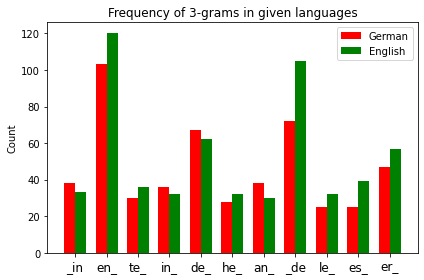

German and French have the following frequent 3 -grams in common: [' in', 'en ', 'in ', 'te ', 'de ', 'an ', ' de', 'et ', 'es ', 'er ']


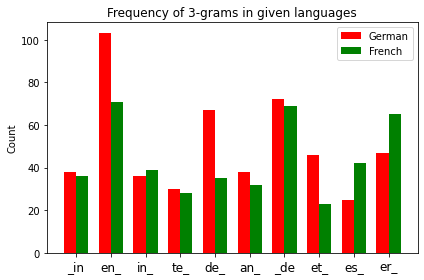

German and Spanish have the following frequent 3 -grams in common: ['en ', 'te ', 'de ', ' de', 'er ']


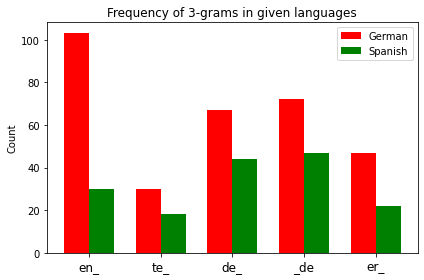

German and Italian have the following frequent 3 -grams in common: [' in', 'en ', 'in ', 'te ', 'de ', 'an ', ' de', 'et ', 'is ', 'er ']


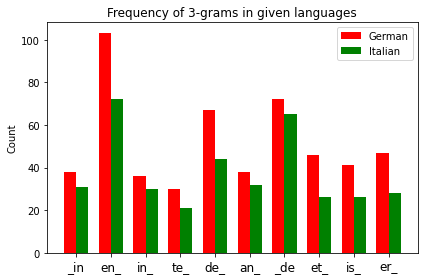

German and Portuguese have the following frequent 3 -grams in common: [' in', 'en ', 'te ', 'ter', 'de ', 'he ', ' de', 'es ', 'is ', 'er ']


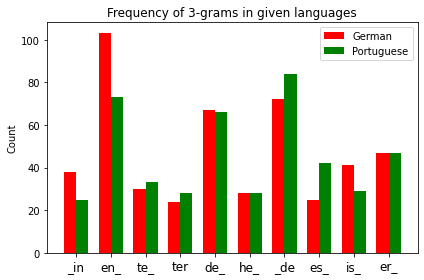

German and Estonian have the following frequent 3 -grams in common: [' in', 'en ', 'in ', 'he ', 'de ', 'an ', 'ter', ' de', 'et ', 'le ', 'es ', 'is ', 'er ']


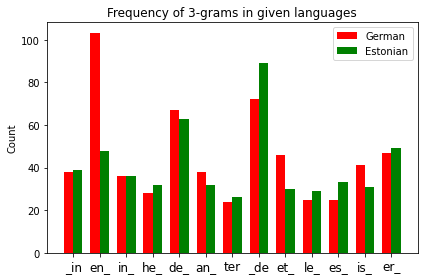

German and Turkish have the following frequent 3 -grams in common: ['en ', 'te ', 'de ', ' de', ' di', 'le ', 'es ', 'er ']


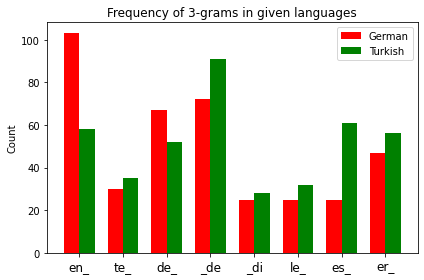

German and Romanian have the following frequent 3 -grams in common: ['en ', 'te ', 'in ', 'de ', 'us ', ' de', 'es ', 'is ', 'er ']


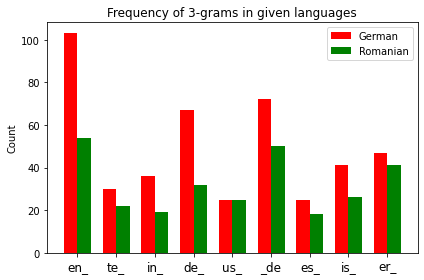

German and Swedish have the following frequent 3 -grams in common: ['en ', 'he ', 'de ', 'an ', ' de', ' di', 'er ']


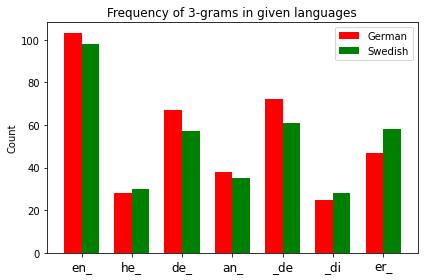

German and Latin have the following frequent 3 -grams in common: ['en ', 'ter', 'de ', 'an ', 'he ', ' de', 'le ', 'es ', 'is ', 'er ']


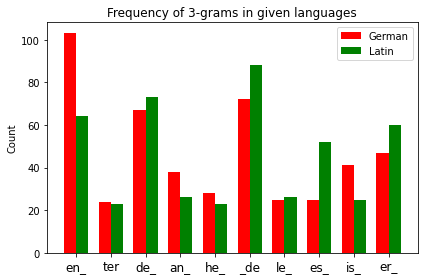

German and Dutch have the following frequent 3 -grams in common: [' in', 'en ', 'te ', 'in ', 'de ', 'an ', 'he ', ' de', 'us ', 'er ']


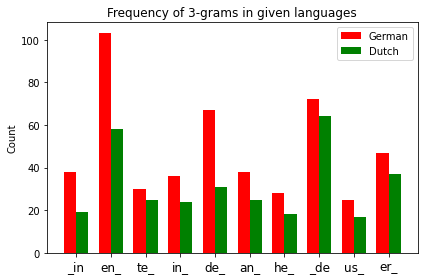


 
French and English have the following frequent 3 -grams in common: [' in', 'en ', 'e d', 'te ', 'de ', 'in ', 'an ', ' de', 'nd ', 'ion', 'es ', 'der', 'er ']


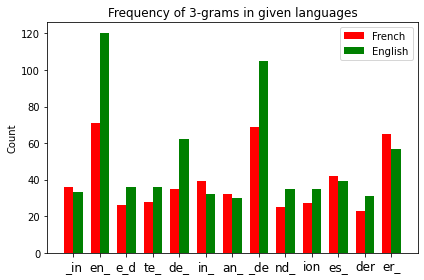

French and Spanish have the following frequent 3 -grams in common: ['en ', 'te ', 'de ', ' co', ' de', 'der', 'er ']


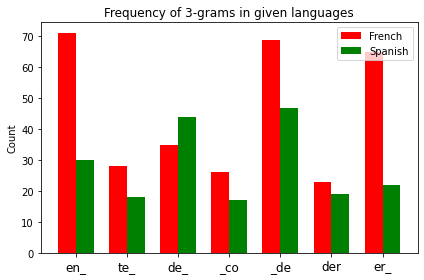

French and Italian have the following frequent 3 -grams in common: [' in', 'en ', 'in ', 'te ', 'de ', 'an ', 'and', ' de', 'et ', 'ion', 'der', 'er ']


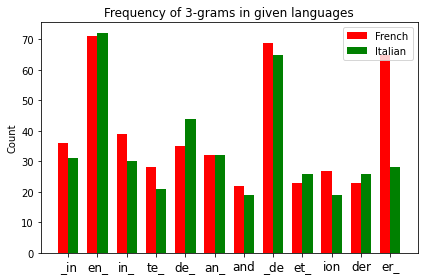

French and Portuguese have the following frequent 3 -grams in common: [' in', 'en ', 'te ', 'and', ' co', 'de ', ' de', 'es ', ' se', 'er ']


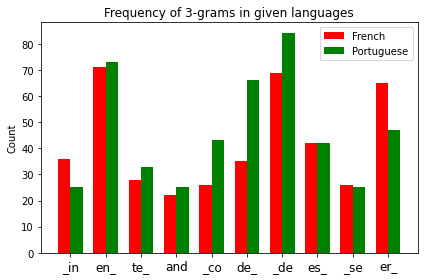

French and Estonian have the following frequent 3 -grams in common: [' in', 'en ', 'in ', 'de ', 'an ', ' de', 'et ', 'es ', 'er ']


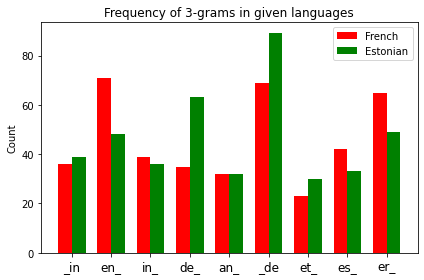

French and Turkish have the following frequent 3 -grams in common: ['en ', 'e d', 'te ', 'de ', ' de', 'es ', 'er ']


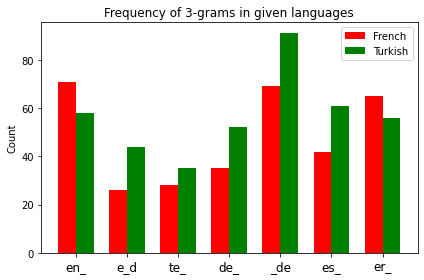

French and Romanian have the following frequent 3 -grams in common: ['en ', 'te ', 'in ', 'de ', ' co', ' de', 'es ', 'der', 'er ']


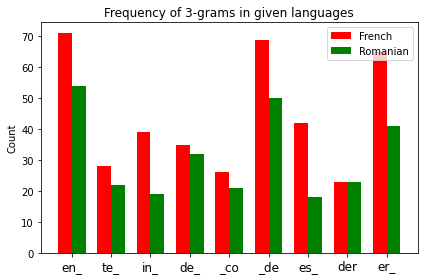

French and Swedish have the following frequent 3 -grams in common: ['en ', 'and', 'de ', 'an ', ' de', 'der', 'er ', 'den']


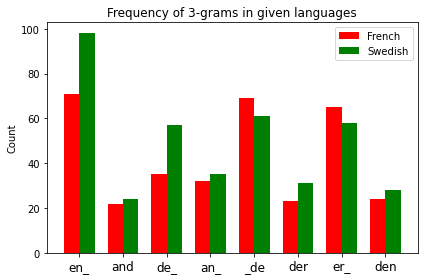

French and Latin have the following frequent 3 -grams in common: ['en ', 'and', 'e d', 'de ', 'an ', ' de', 'nd ', 'es ', 'er ', 'den']


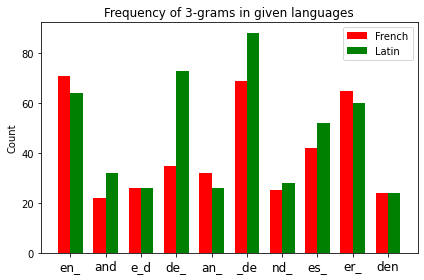

French and Dutch have the following frequent 3 -grams in common: [' in', 'en ', 'te ', 'in ', 'de ', 'an ', 'and', ' de', 'der', 'er ']


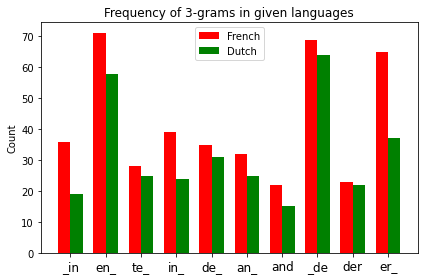


 
Italian and English have the following frequent 3 -grams in common: [' in', 'en ', 'te ', 'in ', 'de ', 'an ', ' de', 'ion', 'ent', 'der', 'er ']


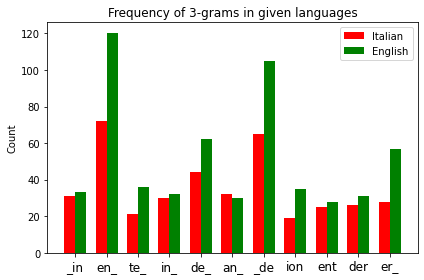

Italian and Spanish have the following frequent 3 -grams in common: ['en ', 'te ', 'de ', ' de', 'ent', 'der', 'er ']


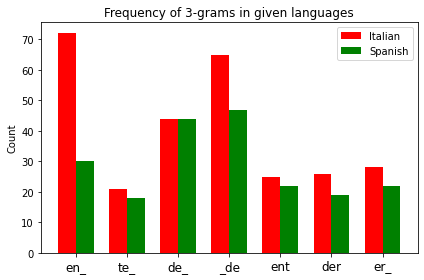

Italian and Portuguese have the following frequent 3 -grams in common: [' in', 'en ', 'te ', 'and', 'de ', ' de', 'ent', 'is ', 'er ']


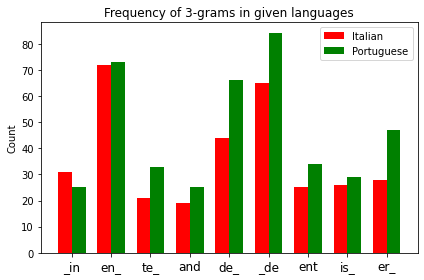

Italian and Estonian have the following frequent 3 -grams in common: [' in', 'en ', 'in ', 'de ', 'an ', ' de', 'et ', 'ent', 'is ', 'er ']


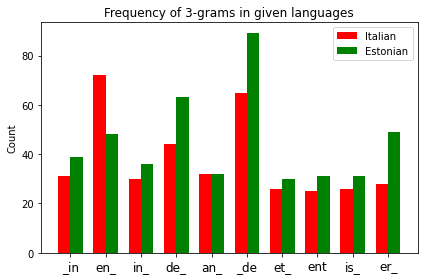

Italian and Turkish have the following frequent 3 -grams in common: ['en ', 'te ', 'de ', 'la ', ' de', 'ent', 'er ', 'ne ']


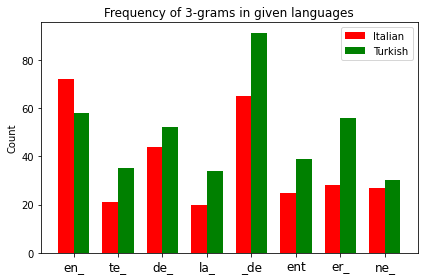

Italian and Romanian have the following frequent 3 -grams in common: ['ne ', 'en ', 'te ', 'in ', 'de ', ' de', 'is ', 'der', 'er ', 'it ']


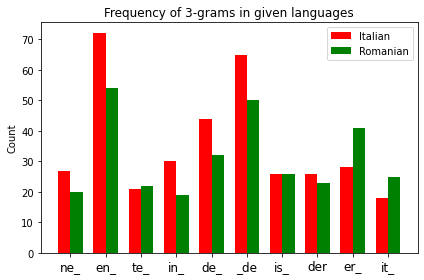

Italian and Swedish have the following frequent 3 -grams in common: ['n d', 'en ', 'and', 'de ', 'an ', ' de', 'der', 'er ']


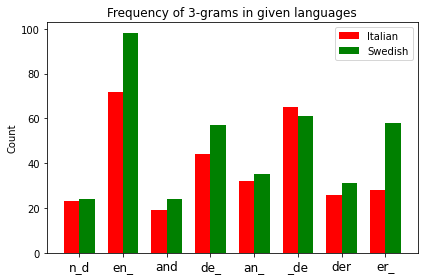

Italian and Latin have the following frequent 3 -grams in common: ['en ', 'and', 'de ', 'an ', ' de', 'ent', 'is ', 'er ']


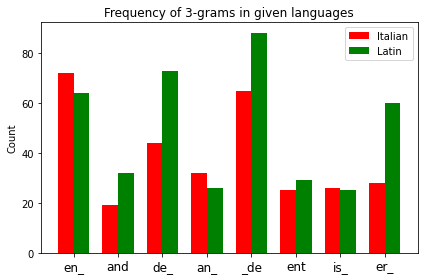

Italian and Dutch have the following frequent 3 -grams in common: ['n d', ' in', 'en ', 'te ', 'in ', 'de ', 'an ', 'la ', ' de', 'and', 'ent', 'der', 'er ']


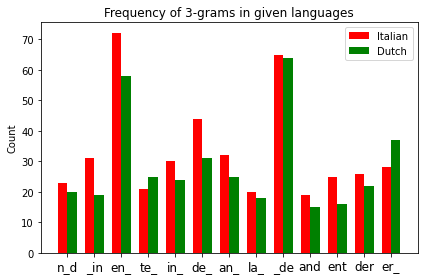


 
Estonian and English have the following frequent 3 -grams in common: [' in', 'en ', 'in ', 'on ', 'de ', 'he ', 'an ', ' de', 'le ', 'es ', 'ent', 're ', 'er ']


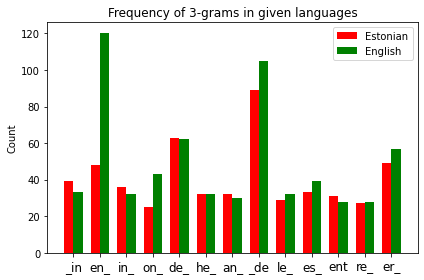

Estonian and Spanish have the following frequent 3 -grams in common: ['en ', 'de ', ' de', 'ent', 'er ']


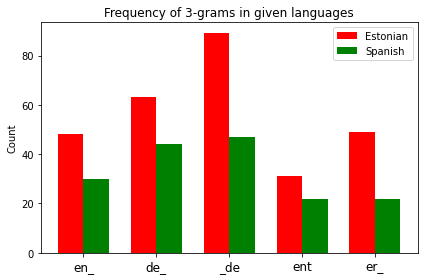

Estonian and Portuguese have the following frequent 3 -grams in common: [' in', 'en ', 'ter', 'de ', 'he ', 'on ', ' de', 'es ', 'ent', 'is ', 're ', 'er ']


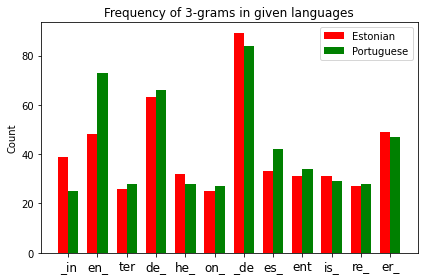

Estonian and Turkish have the following frequent 3 -grams in common: ['en ', 'on ', 'de ', ' de', 'nt ', 'le ', 'es ', 'ent', 're ', 'er ']


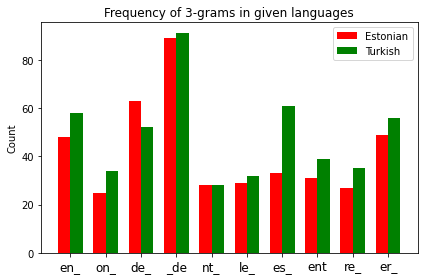

Estonian and Romanian have the following frequent 3 -grams in common: ['en ', 'in ', 'on ', 'de ', ' de', 'es ', 'is ', 're ', 'er ']


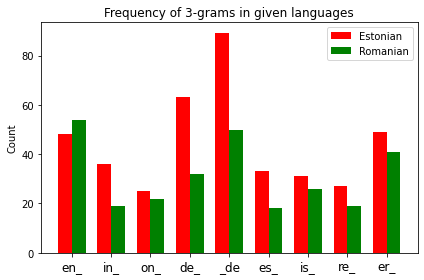

Estonian and Swedish have the following frequent 3 -grams in common: ['en ', 'he ', 'de ', 'an ', 'on ', ' de', 'the', 'er ']


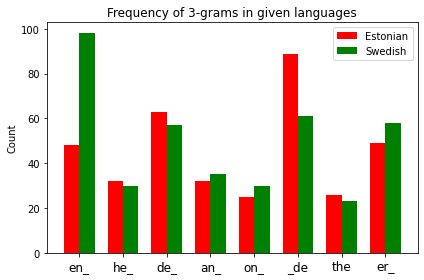

Estonian and Latin have the following frequent 3 -grams in common: ['en ', 'on ', 'de ', 'an ', 'ter', ' de', 'he ', 'le ', 'es ', 'ent', 'is ', 'er ']


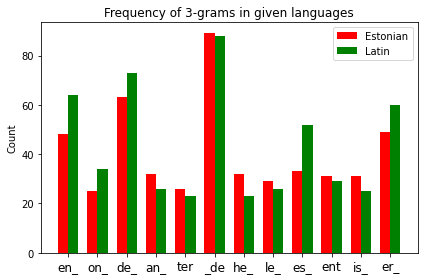

Estonian and Dutch have the following frequent 3 -grams in common: [' in', 'en ', 'in ', 'he ', 'de ', 'an ', ' de', 'ent', 're ', 'er ']


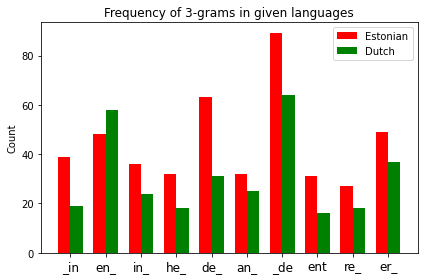


 
Romanian and English have the following frequent 3 -grams in common: ['en ', 'te ', 'on ', 'de ', 'in ', ' de', 'es ', 're ', 'der', 'er ']


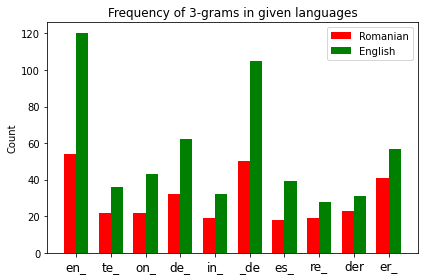

Romanian and Spanish have the following frequent 3 -grams in common: ['en ', 'te ', 'de ', ' co', ' de', 'der', 'er ']


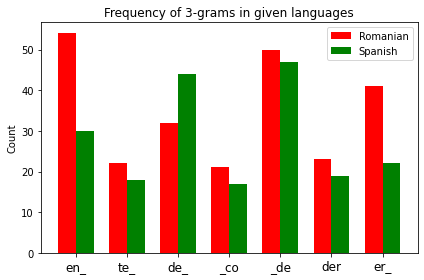

Romanian and Portuguese have the following frequent 3 -grams in common: ['en ', 'te ', 'on ', ' co', 'de ', ' de', 'es ', 'is ', 're ', 'er ']


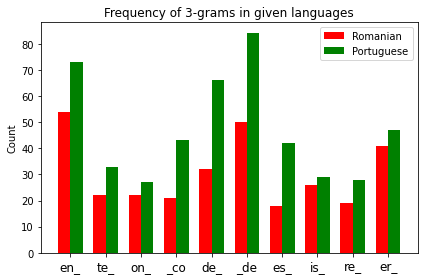

Romanian and Turkish have the following frequent 3 -grams in common: ['en ', 'te ', 'on ', 'de ', ' de', 'es ', 're ', 'er ', 'ne ']


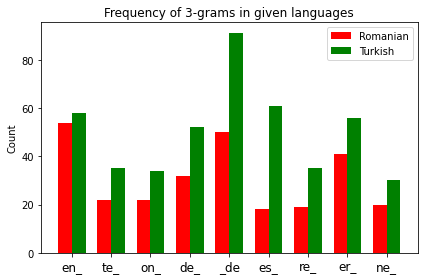

Romanian and Swedish have the following frequent 3 -grams in common: ['en ', 'eri', 'on ', 'de ', ' de', 'der', 'er ']


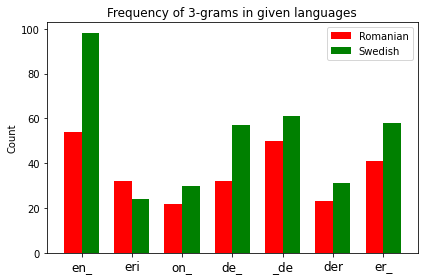

Romanian and Latin have the following frequent 3 -grams in common: ['en ', 'eri', 'on ', 'de ', ' de', 'ed ', 'es ', 'is ', 'er ']


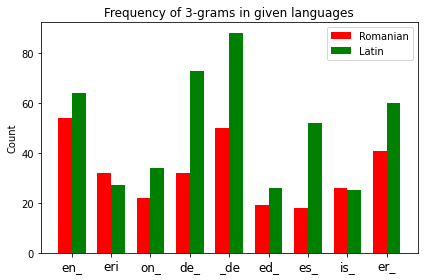

Romanian and Dutch have the following frequent 3 -grams in common: ['en ', 'te ', 'in ', 'de ', 'eri', 'us ', ' de', 're ', 'der', 'er ']


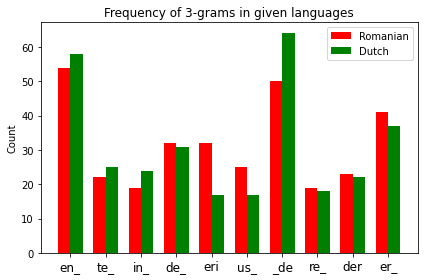


 
Latin and English have the following frequent 3 -grams in common: ['en ', 'e d', 'on ', 'de ', 'he ', 'an ', ' de', 'nd ', 'le ', 'es ', 'ent', 'er ']


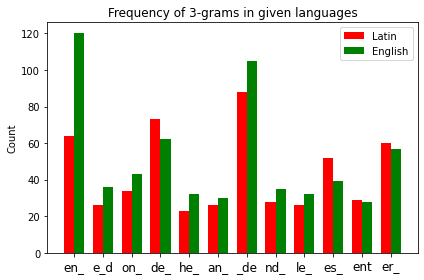

Latin and Spanish have the following frequent 3 -grams in common: ['en ', 'de ', ' de', 'ent', 'er ']


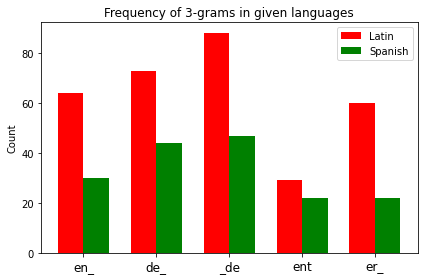

Latin and Portuguese have the following frequent 3 -grams in common: ['en ', 'and', 'ter', 'de ', 'he ', 'on ', ' de', 'es ', 'ent', 'is ', 'er ']


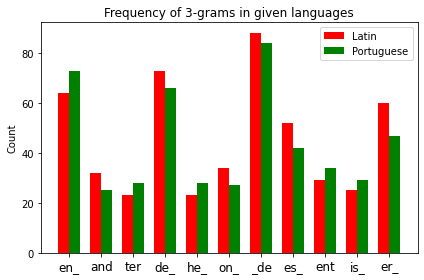

Latin and Turkish have the following frequent 3 -grams in common: ['en ', 'e d', 'on ', 'de ', ' de', 'le ', 'es ', 'ent', 'er ']


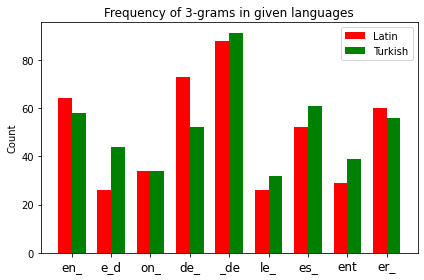

Latin and Swedish have the following frequent 3 -grams in common: ['en ', 'and', 'he ', 'de ', 'an ', 'on ', ' de', 'eri', 'er ', 'den']


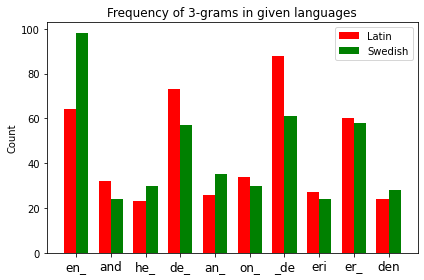

Latin and Dutch have the following frequent 3 -grams in common: ['en ', 'eri', 'he ', 'de ', 'an ', 'and', ' de', 'ent', 'er ', 'ist']


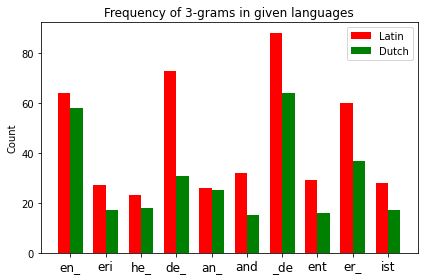


 
similar languages based on  3 - grams:
German : ['English', 'French', 'Spanish', 'Italian', 'Portuguese', 'Estonian', 'Turkish', 'Romanian', 'Swedish', 'Latin', 'Dutch']
French : ['English', 'Spanish', 'Italian', 'Portuguese', 'Estonian', 'Turkish', 'Romanian', 'Swedish', 'Latin', 'Dutch']
Italian : ['English', 'Spanish', 'Portuguese', 'Estonian', 'Turkish', 'Romanian', 'Swedish', 'Latin', 'Dutch']
Estonian : ['English', 'Spanish', 'Portuguese', 'Turkish', 'Romanian', 'Swedish', 'Latin', 'Dutch']
Romanian : ['English', 'Spanish', 'Portuguese', 'Turkish', 'Swedish', 'Latin', 'Dutch']
Latin : ['English', 'Spanish', 'Portuguese', 'Turkish', 'Swedish', 'Dutch']

 
German and English have the following frequent 4 -grams in common: [' in ', 'the ', 'den ', ' en ', ' the', ' de ']


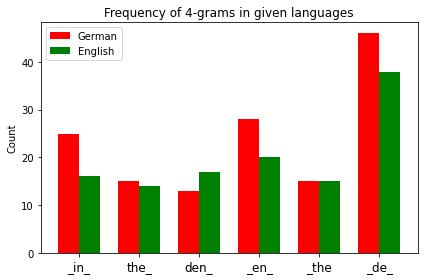

German and French have the following frequent 4 -grams in common: ['and ', ' in ', 'den ', 'n de', ' de ', 'ing ']


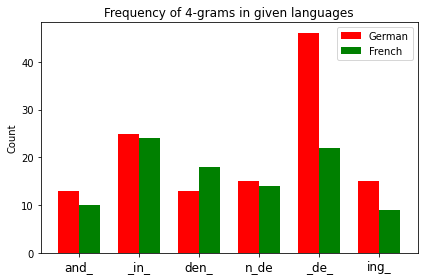

German and Italian have the following frequent 4 -grams in common: ['and ', 'een ', ' in ', 'den ', 'n de', ' en ', ' de ']


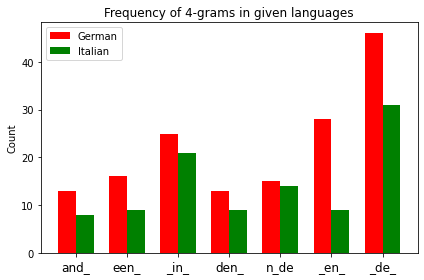

German and Portuguese have the following frequent 4 -grams in common: ['and ', ' in ', ' pro', 'den ', ' en ', ' de ']


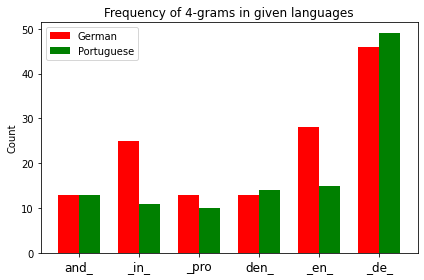

German and Estonian have the following frequent 4 -grams in common: [' in ', 'the ', 'van ', ' van', ' the', ' de ', 'ing ']


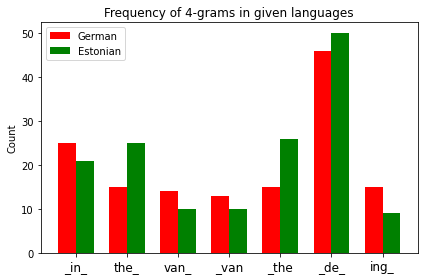

German and Swedish have the following frequent 4 -grams in common: ['the ', 'den ', 'n de', ' the', ' de ']


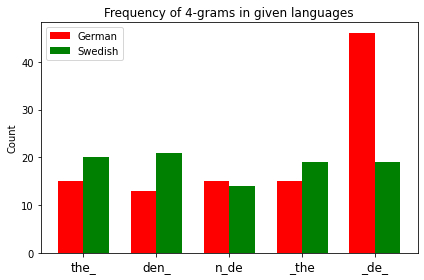

German and Latin have the following frequent 4 -grams in common: ['and ', 'the ', 'den ', ' the', ' de ']


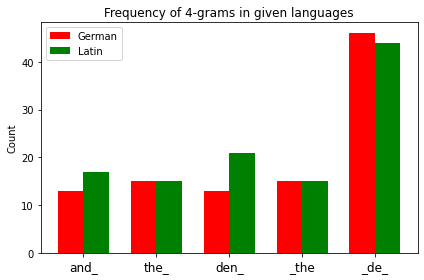

German and Dutch have the following frequent 4 -grams in common: ['and ', ' in ', 'the ', 'den ', 'van ', 'n de', ' van', ' the', ' de ']


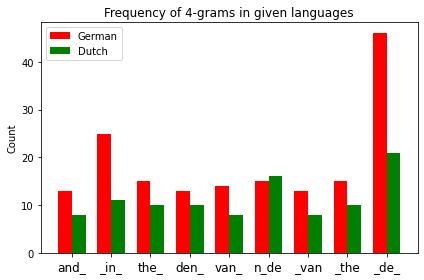


 
French and English have the following frequent 4 -grams in common: [' in ', 'tion', ' con', 'den ', 'der ', 'und ', ' de ', 'e de']


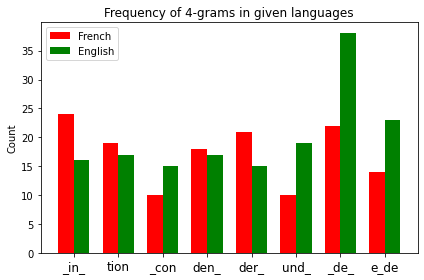

French and Italian have the following frequent 4 -grams in common: ['and ', ' in ', ' com', 'der ', 'den ', ' der', 'n de', ' de ']


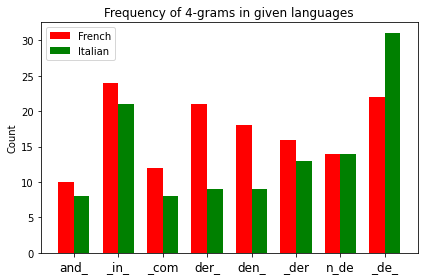

French and Portuguese have the following frequent 4 -grams in common: ['and ', ' in ', ' con', ' com', 'den ', 'der ', ' de ', 'e de']


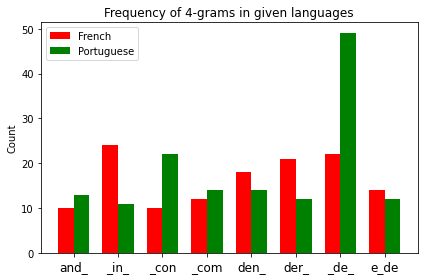

French and Estonian have the following frequent 4 -grams in common: ['atio', ' in ', 'tion', ' de ', 'ing ', 'e de']


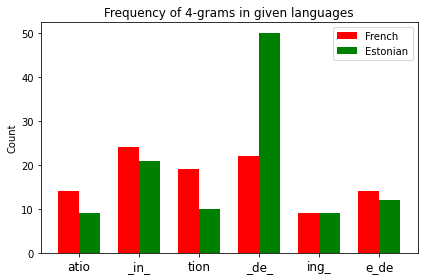

French and Turkish have the following frequent 4 -grams in common: [' in ', ' con', 'der ', ' de ', 'e de']


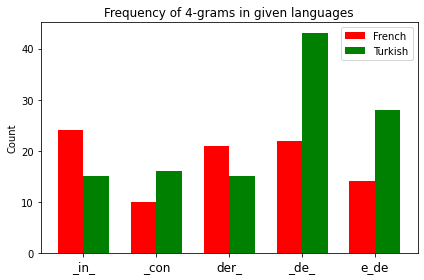

French and Romanian have the following frequent 4 -grams in common: [' in ', ' con', 'den ', 'der ', ' der', ' de ']


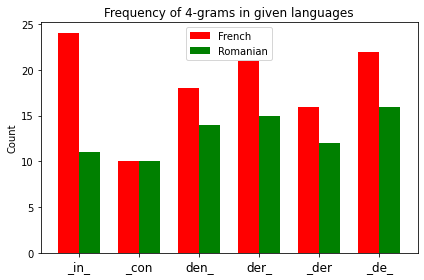

French and Swedish have the following frequent 4 -grams in common: ['n de', ' de ', 'der ', 'den ']


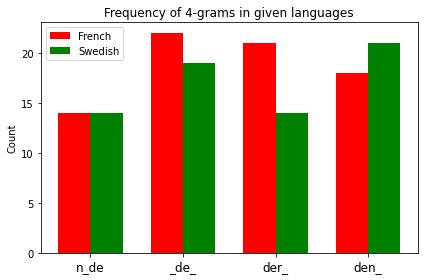

French and Latin have the following frequent 4 -grams in common: ['and ', ' com', 'den ', ' den', ' de ', 'e de']


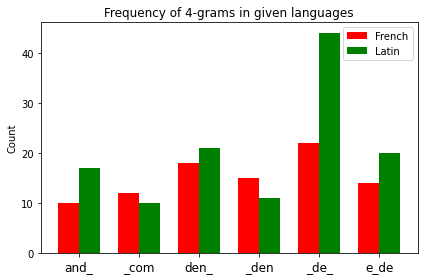

French and Dutch have the following frequent 4 -grams in common: ['and ', ' in ', 'tion', 'der ', 'den ', ' der', 'n de', ' de ']


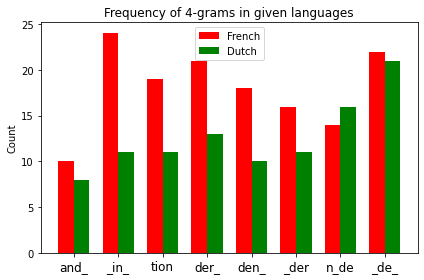


 
Italian and English have the following frequent 4 -grams in common: [' in ', ' la ', 'den ', 'der ', ' en ', ' de ']


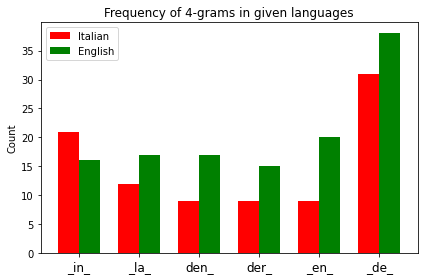

Italian and Portuguese have the following frequent 4 -grams in common: ['and ', ' in ', 'ment', ' la ', ' com', 'den ', 'der ', ' en ', ' de ']


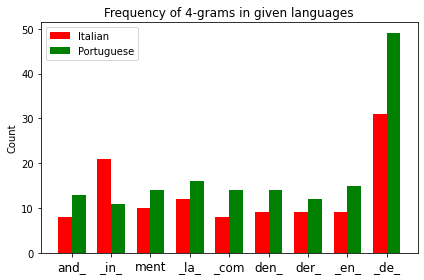

Italian and Estonian have the following frequent 4 -grams in common: [' in ', 'ment', ' la ', ' par', ' de ']


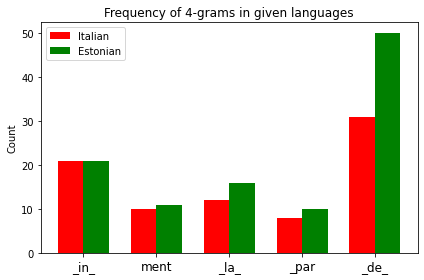

Italian and Turkish have the following frequent 4 -grams in common: [' in ', 'ment', ' la ', ' et ', ' est', 'der ', ' en ', ' de ']


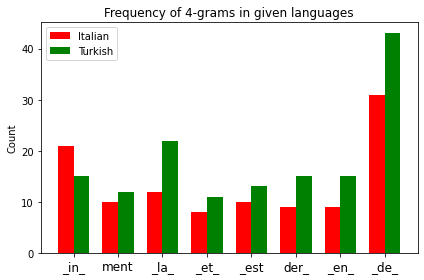

Italian and Romanian have the following frequent 4 -grams in common: [' in ', ' et ', 'den ', 'der ', ' der', ' de ']


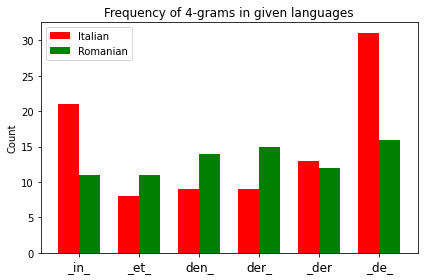

Italian and Swedish have the following frequent 4 -grams in common: ['n de', ' de ', 'der ', 'den ']


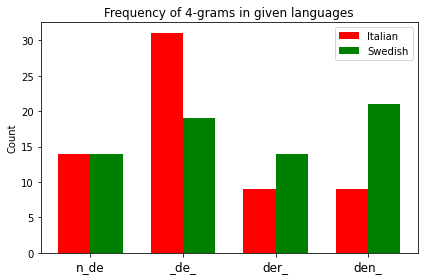

Italian and Latin have the following frequent 4 -grams in common: ['and ', 'ment', ' com', 'den ', ' de ']


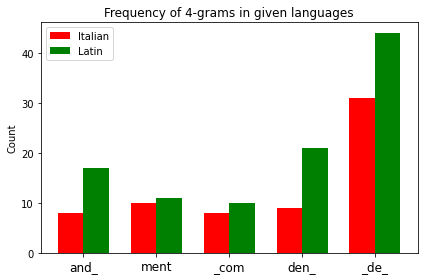

Italian and Dutch have the following frequent 4 -grams in common: ['and ', ' in ', ' la ', 'der ', 'den ', ' der', 'n de', ' de ']


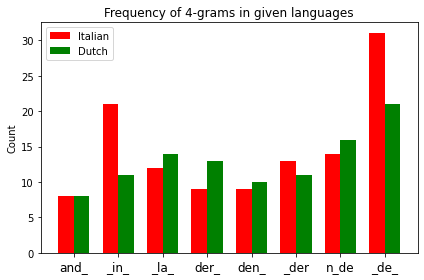


 
Estonian and English have the following frequent 4 -grams in common: [' in ', 'the ', 'tion', ' la ', 'ter ', ' the', ' de ', 'e de']


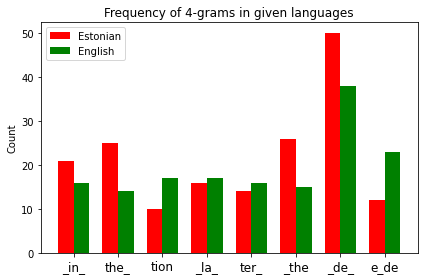

Estonian and Portuguese have the following frequent 4 -grams in common: [' in ', 'ment', ' la ', 's de', ' de ', 'e de']


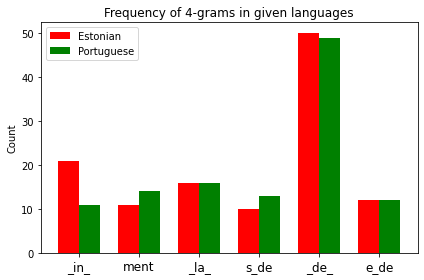

Estonian and Turkish have the following frequent 4 -grams in common: ['ent ', ' in ', 'ment', ' la ', 's de', ' de ', 'e de']


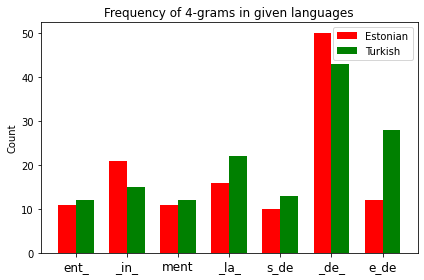

Estonian and Swedish have the following frequent 4 -grams in common: ['the ', ' the', ' de ', ' ver']


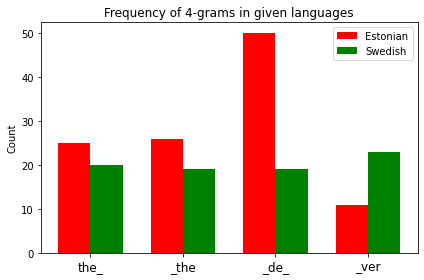

Estonian and Latin have the following frequent 4 -grams in common: ['ent ', 'ment', 'the ', 'ter ', 's de', ' the', ' de ', 'e de']


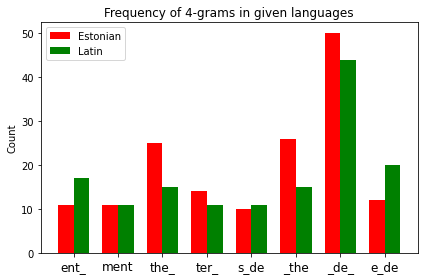

Estonian and Dutch have the following frequent 4 -grams in common: [' in ', 'the ', 'tion', ' la ', 'van ', ' van', ' the', ' de ']


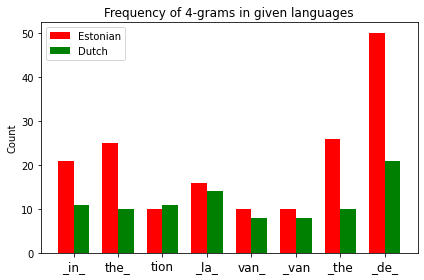


 
Romanian and English have the following frequent 4 -grams in common: [' in ', ' con', 'der ', 'den ', ' de ']


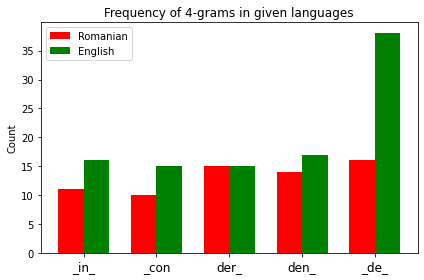

Romanian and Portuguese have the following frequent 4 -grams in common: [' in ', ' con', 'der ', 'den ', ' de ']


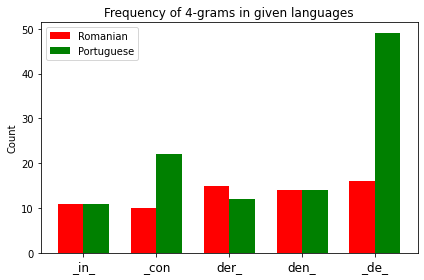

Romanian and Turkish have the following frequent 4 -grams in common: [' in ', ' con', ' et ', 'der ', ' de ']


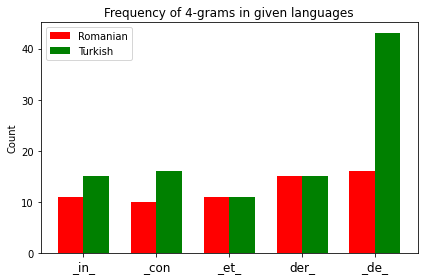

Romanian and Dutch have the following frequent 4 -grams in common: [' in ', 'den ', 'der ', ' der', ' de ']


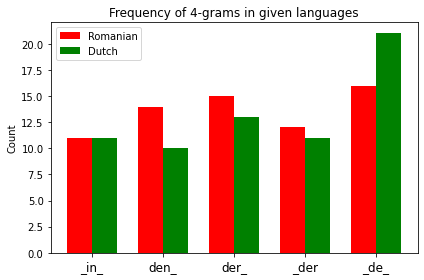


 
Latin and English have the following frequent 4 -grams in common: ['the ', 'ter ', 'den ', ' of ', ' the', ' de ', 'e de']


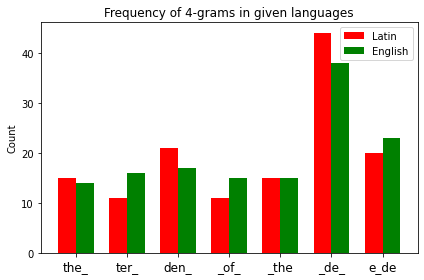

Latin and Portuguese have the following frequent 4 -grams in common: ['and ', 'ment', ' com', 'den ', 's de', ' of ', ' de ', 'e de']


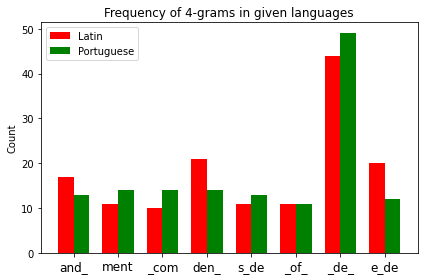

Latin and Turkish have the following frequent 4 -grams in common: ['ent ', 'ment', 's de', ' de ', 'e de']


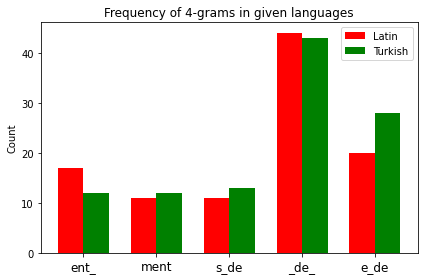

Latin and Swedish have the following frequent 4 -grams in common: ['the ', ' the', ' de ', 'den ']


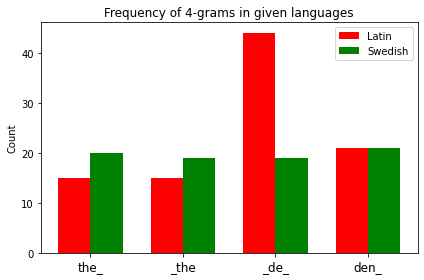

Latin and Dutch have the following frequent 4 -grams in common: ['and ', 'the ', 'den ', ' the', ' de ']


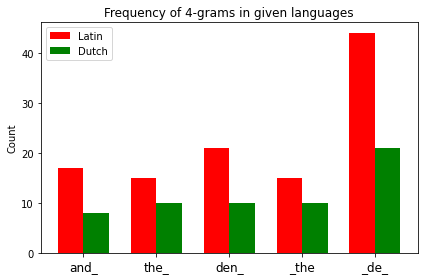


 
similar languages based on  4 - grams:
German : ['English', 'French', 'Italian', 'Portuguese', 'Estonian', 'Swedish', 'Latin', 'Dutch']
French : ['English', 'Italian', 'Portuguese', 'Estonian', 'Turkish', 'Romanian', 'Swedish', 'Latin', 'Dutch']
Italian : ['English', 'Portuguese', 'Estonian', 'Turkish', 'Romanian', 'Swedish', 'Latin', 'Dutch']
Estonian : ['English', 'Portuguese', 'Turkish', 'Swedish', 'Latin', 'Dutch']
Romanian : ['English', 'Portuguese', 'Turkish', 'Dutch']
Latin : ['English', 'Portuguese', 'Turkish', 'Swedish', 'Dutch']

 
German and Italian have the following frequent 5 -grams in common: [' een ', 'n de ', ' het ', ' the ', ' van ']


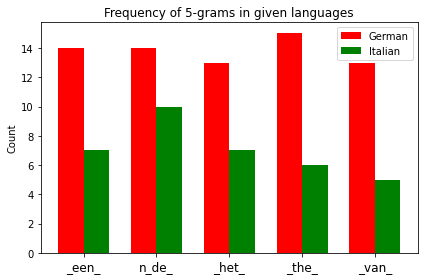


 
French and English have the following frequent 5 -grams in common: [' die ', ' and ', 'ation', ' the ', ' und ', ' den ']


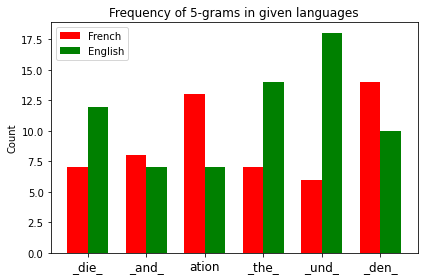

French and Italian have the following frequent 5 -grams in common: [' in d', 'in de', 'ation', ' the ', ' der ']


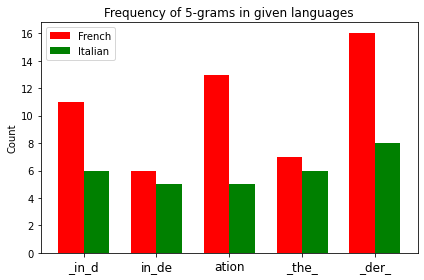

French and Portuguese have the following frequent 5 -grams in common: [' die ', ' the ', ' der ', ' den ', 's de ']


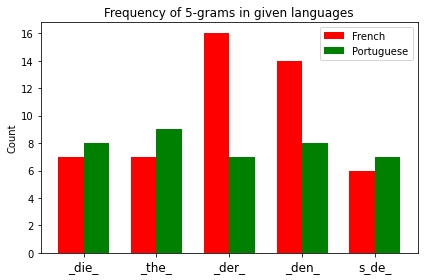

French and Swedish have the following frequent 5 -grams in common: [' die ', ' and ', ' the ', ' der ', ' und ']


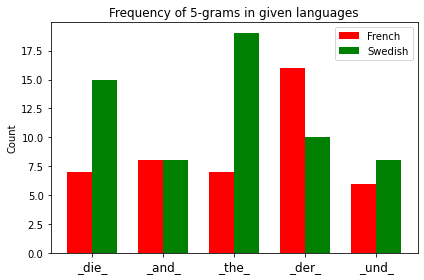

French and Latin have the following frequent 5 -grams in common: [' och ', ' and ', ' the ', ' der ', ' den ', 's de ']


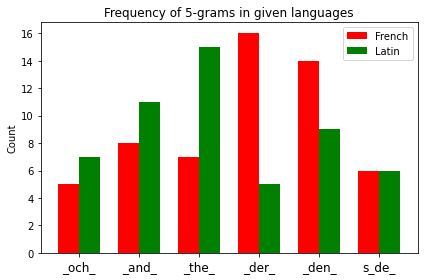


 
Italian and Estonian have the following frequent 5 -grams in common: [' the ', 'ation', ' het ', ' van ']


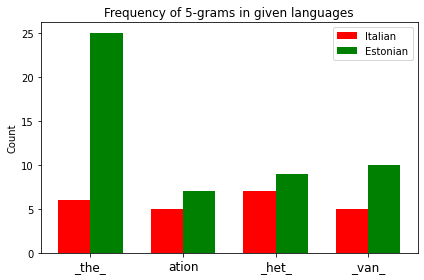

Italian and Dutch have the following frequent 5 -grams in common: ['n de ', 'ation', ' the ', ' der ', ' van ']


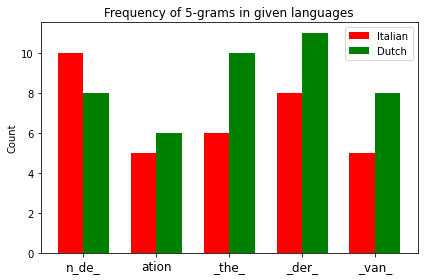


 
Estonian and Latin have the following frequent 5 -grams in common: [' the ', ' was ', 'ment ', 'e de ']


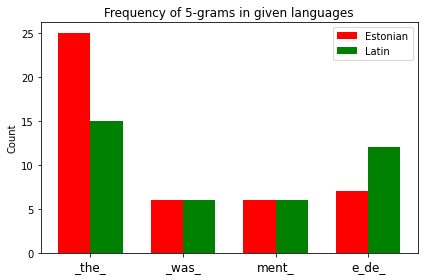


 

 
Latin and English have the following frequent 5 -grams in common: [' the ', ' den ', ' and ', 'tion ']


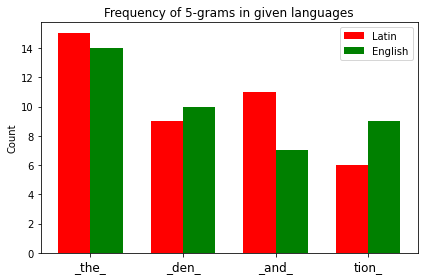

Latin and Portuguese have the following frequent 5 -grams in common: ['e de ', ' the ', ' der ', ' den ', 's de ']


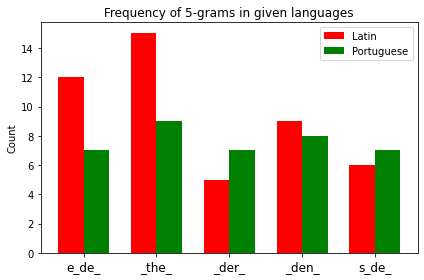

Latin and Turkish have the following frequent 5 -grams in common: [' des ', 's de ', ' der ', 'e de ']


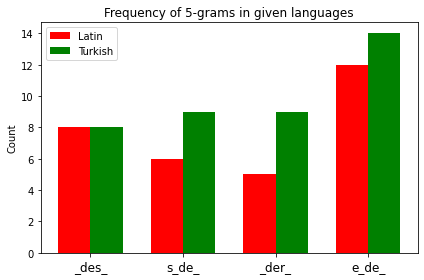


 
similar languages based on  5 - grams:
German : ['Italian']
French : ['English', 'Italian', 'Portuguese', 'Swedish', 'Latin']
Italian : ['Estonian', 'Dutch']
Estonian : ['Latin']
Romanian : []
Latin : ['English', 'Portuguese', 'Turkish']

 


In [42]:
x_train, y_train = preprocess(X_train[:-1],Y_train[:-1])

lang_corpora, lang_idx = data_by_lang(x_train, y_train)
# produce charts of counts of common n-grams in different languages, and a table suggesting similar languages based on these

for n_gram_size in range(3, 6):
    m_samples = 20
    latin_languages = ['German', 'English', 'French', 'Spanish', 'Italian', 'Portuguese', 
                       'Estonian', 'Turkish', 'Romanian', 'Swedish', 'Latin', 'Dutch']

    ng_related = {}
    
    x_train_grams = make_n_grams(x_train, y_train, n_gram_size, latin_languages)
    sorted_tf_per_lang = sort_by_tf(x_train_grams, y_train)

    for lang_key in latin_languages:
        ng_related[lang_key] = []
        latin_languages.remove(lang_key)
        latin_langs = latin_languages
        for otherlang in latin_langs:
            top_m = list(sorted_tf_per_lang[lang_key].keys())[:m_samples]
            top_m_x = list(sorted_tf_per_lang[otherlang].keys())[:m_samples]

            # compares the two top m lists for common elements:
            common_ngrams = list(set(top_m).intersection(top_m_x))
                
            if len(common_ngrams) > 3: # if two languages share 4 or more n-grams in their top n n-grams
                
                print(lang_key, "and", otherlang, "have the following frequent", n_gram_size,"-grams in common:",common_ngrams)
                ng_related[lang_key].append(otherlang)
                
            # find counts of the entries in common_ngrams for each language.
            # These are stored as the values corresponding to the ngram keys in the dictionary

                counts_langkey = []
                counts_otherlang = []
                for i in common_ngrams:
                    counts_langkey.append(sorted_tf_per_lang[lang_key][i])
                    counts_otherlang.append(sorted_tf_per_lang[otherlang][i])

                common_ngrams = [k.replace(' ', '_') for k in common_ngrams]

                # code for bar chart:
                x = np.arange(len(common_ngrams))  # the label locations
                width = 0.35  # the width of the bars

                fig, ax = plt.subplots()
                rects1 = ax.bar(x - width/2, counts_langkey, width, color = 'r', label=lang_key)
                rects2 = ax.bar(x + width/2, counts_otherlang, width, color = 'g', label=otherlang)
                ax.set_ylabel('Count')
                ax.set_title('Frequency of %s-grams in given languages' % (n_gram_size))
                ax.set_xticks(x)
                ax.set_xticklabels(common_ngrams, fontsize=12)
                ax.legend()
                fig.tight_layout()

                plt.show()

                #counts_langkey = []
                #counts_otherlang = []

        print('\n ')                 
    
    print('similar languages based on ', n_gram_size, '- grams:')
    for key, val in ng_related.items():
        print(key, ':', val)
    print('\n ')

### Naive Bayes Classifier
To obtain a baseline for the language identification task we employ a simple Naive Bayes classifier. Our first step is to collect the top n-grams into feature matrices...

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB

In [44]:
# extracts lists of top n frequent n-grams from data
def get_top_n_features(X_grams, Y, n_features):
  sorted_freq_per_lang = sort_by_tf(X_grams, Y)

  features = []
  for lang, grams_dict in sorted_freq_per_lang.items():
      i = 0
      for gram, count in grams_dict.items():
          if i <= n_features:
              features.append(gram)
          else:
              break
          i += 1
      
  return list(set(features))

In [45]:
# convert data to feature matrix
def create_feature_matrix(X, Y, n_instances, n_features, n_gram_size):
#  mat = np.zeros((n_instances,n_features))
#  i = 0
#  for sent in data:
#      trigrams = [sent[i:i+] for i in range(len(sent)-3+1)]
#      tri_dict = dict(zip(collections.Counter(trigrams).keys(), collections.Counter(trigrams).values()))
#      gram_count = []
#      for gram in features:
#          if gram in tri_dict.keys():
#              gram_count.append(tri_dict[gram]+1)
#          else:
#              gram_count.append(1)
#      mat[i] = gram_count
#      i+=1

  return mat

In [46]:
n_instances = 200 # instance per language
x_train, y_train = preprocess(X_train[:-1], Y_train[:-1])
x_train, y_train = get_data_chunk(x_train, y_train, n_instances)

# x_train_grams = make_n_grams(x_train, y_train, n_gram_size)

# create features for dataset
n_gram_size = 5
n_features = 30 # features per language
features = get_top_n_features(x_train_grams, y_train, n_features, n_gram_size)

# Convert dataset into feature matrix
n_instances = len(x_train) # total instances in dataset
n_features = len(features) # total features
feature_matrix = create_feature_matrix(x_train_grams, features)

TypeError: ignored

In [ ]:
# Gaussian Naive Bayes Model Training
encoder = LabelEncoder()
Y = encoder.fit_transform(y_train)
model = GaussianNB()
model.fit(X,Y)

In [ ]:
# model testing
x,y = preprocess(X_test[:20000], Y_test[:20000])
x = create_feature_matrix(x, len(x), n_features)
y = encoder.fit_transform(y)
y_pred = model.predict(x)
conf_matrix = confusion_matrix(y_pred=y_pred, y_true=y)
acc = round(accuracy_score(y_pred=y_pred, y_true=y), 4) * 100
print(f"Accuracy is {acc}%") 

# confusion matrix plot
plt.subplots(figsize=(10,10))
sns.heatmap(conf_matrix,annot=True,fmt=".1f",linewidths=1.5)
plt.xlabel("Predicted Language")
plt.ylabel("Correct Language")
plt.show()

In [ ]:
# Model                Instance_per_language   N_gram       Features_per_language         Accuracy             Test_Instance
# GaussianNB              150                     3                   40                     79%                   20k
# GaussianNB              150                     4                   40                     87%                   20k
# GaussianNB              150                     5                   40                     87%                   25k
# GaussianNB              200                     5                   30                     85%                   25k
# MultinomialNB           150                     3                   40                     77%                   25k  
# MultinomialNB           150                     4                   40                     73%                   25k  

### RNN Classifier


In [ ]:
import torch

In [ ]:
class RNN(nn.Module):
    def __init__(self,input_size,hid_size,output_size,layers,embedding):

        super(RNN, self).__init__()
        self.hidden_dim = hid_size
        self.layers = layers
        self.embedding_size = embedding 
        self.input_size = input_size
        self.output_size = output_size
        self.embeddings = nn.Embedding(self.input_size,self.embedding_size)
        self.rnn = nn.RNN(input_size=self.embedding_size,hidden_size=self.hidden_dim,num_layers = self.layers)
        self.linear = nn.Linear(self.hidden_dim,self.output_size)

    
    def forward(self,x):
        batch_size = x.size(0)

        x = x.t()

        #print(" input ",x.size())
        embedded = self.embeddings(x)
        #print(" embeddings ", embedded.size())

        hidden = self._init_hidden(batch_size)
        output,hidden = self.rnn(embedded,hidden)
        #print(" LSTM hidden output", hidden.size())

        fc_output = self.linear(hidden)
        #print(" fc output ", fc_output.size())
        return fc_output


    def _init_hidden(self,batch_size):
        hidden_state = torch.zeros(self.layers,batch_size, self.hidden_dim, device=device)
        return Variable(hidden_state)

In [ ]:
def time_since(since):
    s = time.time() - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

In [ ]:
# Data Preperation
# A list containing examples from every language is given as input
# Each of these examples are broken down into ngrams of specific ngram say trigram
# For each example, a vector is created which contains indices of trigrams which are also part of vocabulary (or feature set). Rest all the trigram of the example is discarded
# These vectors are then padded with zero to make their size equal.
def create_batch(data,ngram):
  '''
  This function prepares data as input to RNN .
  Input : "data" is list of examples in different languages ; Size : N
          "ngram"
  Output : It returns a dataset in numerical form where numerical values are indices of grams in vocabulary ; Size N x M
            Refer to padding() function to know about M
  '''
  tup = [ create_iv(example,ngram) for example in data]
  inps = [ t[0] for t in tup]
  lengths = torch.LongTensor([t[1] for t in tup])
  return padding(inps,lengths)


def create_iv(data,n):
  '''
  This function is used to convert a text into list of numerical based on bag of words
  Input : "data" is a sentence/paragraph in a language.
          "n" is ngram size
  Output : tuple(A,B) where A is list of ngrams indices wrt vocabulary and B is length of list A

  '''
  ngrams = [data[i:i+n] for i in range(len(data)-n+1)]
  gram_idx =[word_to_ix[w] for w in ngrams if w in list(word_to_ix.keys()) ]
  return gram_idx, len(gram_idx)
    

def padding(vector_inps, lengths ):
  '''
  This function takes variable lengths vectors and convert them into equal length by padding 0
  Input : "vector_inps" list of vectors containing indices of ngrams
          "lengths " length of each vector
  Output : tensor containing vectors of equal length after padding. This length is equal to maximum number(M) in list of "lengths".
  '''
  inp_tensor = torch.zeros((len(vector_inps),lengths.max()), device= device).long()
  for idx, (seq, seq_len) in enumerate(zip(vector_inps,lengths)):
    inp_tensor[idx, :seq_len] = torch.LongTensor(seq)
  return inp_tensor


In [ ]:
def train(decoder, inp, target):
    decoder.zero_grad()
    loss = 0
    output = decoder(inp)
    #target = target.type_as(output)
    loss += criterion(output[0], target)
    loss.backward()
    decoder_optimizer.step()

    return loss.item()

In [ ]:
n_instances = 150 # instance per language
x_train,y_train = preprocess(X_train[:-1],Y_train[:-1])
x_train,y_train = get_data_chunk(x_train,y_train,n_instances)

label = list(set(y_train)) # List of all languages
labels_to_idx = { lang:i  for i,lang in enumerate(label)} # Dictionary of languages with a integer assigned to all, {'English':0,'Arabic':1,....}
y_label = torch.zeros(len(y_train),device=device).long()
for i in range(len(y_label)):
  y_label[i] = labels_to_idx[y_train[i]] 


# Creating vocabulary using top ngrams from each language
n_gram = 3
top_n = 50 # top ngrams per language
data,_ = data_by_lang(x_train,y_train)
bow = get_bow(data,top_n,n_gram) # This will act as vocabulary
word_to_ix = {word: i for i, word in enumerate(bow)} 

hidden_size = 64
input_size = len(bow) # Number of grams in vocabulary
output_size = len(label) # Number of languages
n_layers = 1 # Number of layers of RNN
embedding_size = 64
lr = 0.001
model = RNN(input_size,hidden_size,output_size,n_layers,embedding_size).to(device)
decoder_optimizer = torch.optim.Adam(model.parameters(), lr=lr)
criterion = nn.CrossEntropyLoss()
start = time.time()
print_every = 10
all_losses = []
loss_avg = 0
n_epochs = 30
inp = create_batch(x_train,3)